In [212]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [213]:
#Train File Uploaded
train= pd.read_csv(r'D:\5th semester\IDM\IDM Project\Loan-Prediction-Dataset-master\train.csv', encoding= 'latin-1')
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# #DATA PREPARATION

In [214]:
#Data Types of Attributes
display(train.dtypes.value_counts())

object     8
float64    4
int64      1
dtype: int64

In [215]:
#Splitting Number and Categorical attributes
num_var=train.columns[train.dtypes !='object']
cat_var=train.columns[train.dtypes == 'object']
print(num_var)
print(cat_var)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

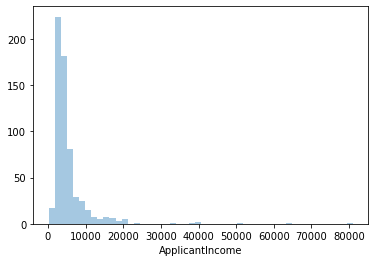

In [216]:
#train.dtypes=='object'
sns.distplot(train.ApplicantIncome,kde=False)

<AxesSubplot:xlabel='LoanAmount'>

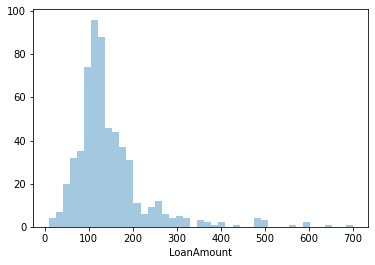

In [217]:
sns.distplot(train.LoanAmount,kde=False)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

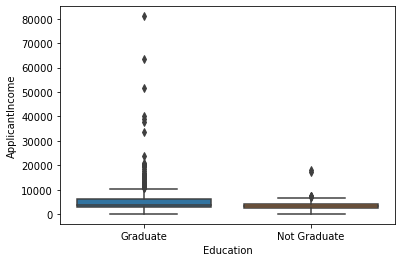

In [218]:
sns.boxplot(x='Education',y='ApplicantIncome',data=train)

In [219]:
train[num_var]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [220]:
#Finding Missing Values
train[num_var].isnull().sum().sort_values(ascending=False)

Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64

In [221]:
#Filling Random values in the data
train.Credit_History = train.Credit_History.fillna(1.0)
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360.0)

In [222]:
train[num_var].isnull().sum().sort_values(ascending=False)

Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
dtype: int64

In [223]:
train[cat_var].isnull().sum().sort_values(ascending=False)

Self_Employed    32
Dependents       15
Gender           13
Married           3
Loan_Status       0
Property_Area     0
Education         0
Loan_ID           0
dtype: int64

In [224]:
train.Self_Employed = train.Self_Employed.fillna('No')
train.Dependents = train.Dependents.fillna('0')
train.Gender = train.Gender.fillna('Male')
train.Married = train.Married.fillna('Yes')


In [225]:
train[cat_var].isnull().sum().sort_values(ascending=False)

Loan_Status      0
Property_Area    0
Self_Employed    0
Education        0
Dependents       0
Married          0
Gender           0
Loan_ID          0
dtype: int64

In [226]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['TotalIncome']= train['ApplicantIncome'] +train['CoapplicantIncome'] 
train['TotalIncome_log']=np.log(train['TotalIncome'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount_log'>

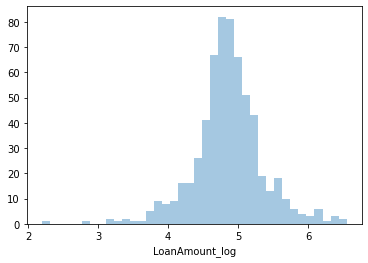

In [227]:
sns.distplot(train.LoanAmount_log,kde=False)

<AxesSubplot:xlabel='TotalIncome_log'>

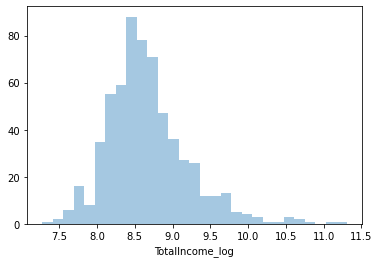

In [228]:
sns.distplot(train.TotalIncome_log,kde=False)

<AxesSubplot:>

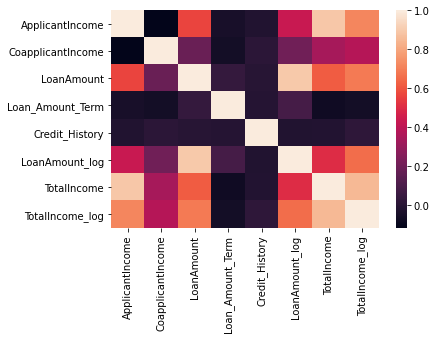

In [229]:
sns.heatmap(train.corr())

In [230]:
#test[num_var].isnull().sum().sort_values(ascending=False)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


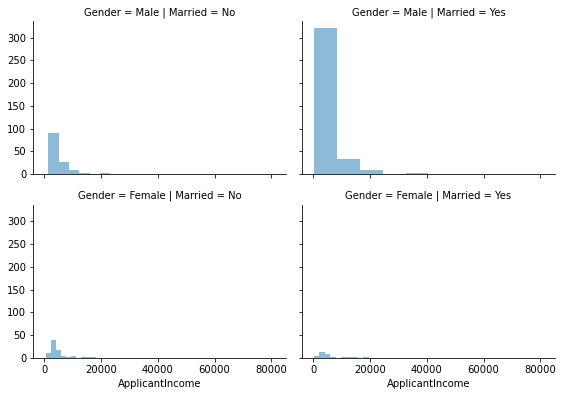

In [248]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(train, row='Gender', col='Married', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


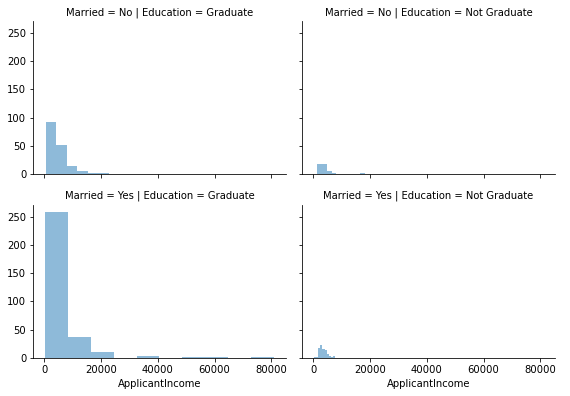

In [249]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(train, row='Married', col='Education', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


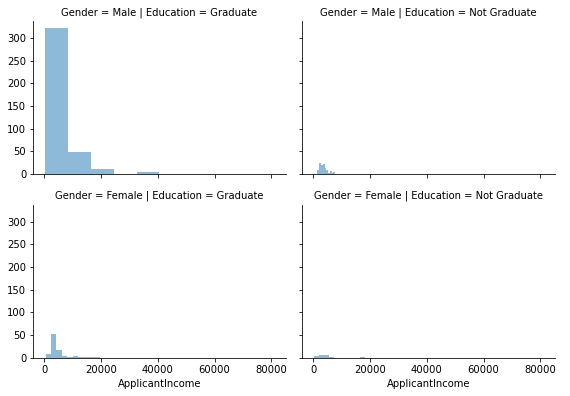

In [250]:
g=sns.FacetGrid(train, row='Gender', col='Education', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

## Splitting training data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


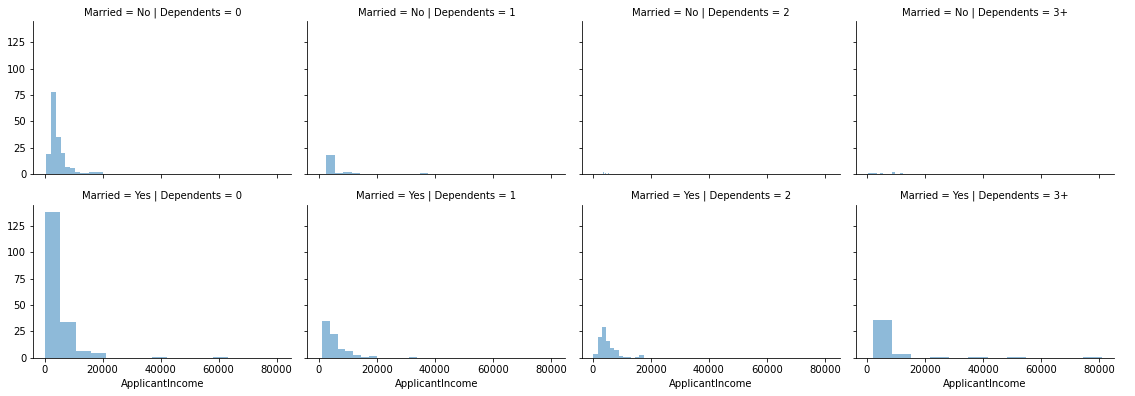

In [251]:
g=sns.FacetGrid(train, row='Married', col='Dependents', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=12)
g.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


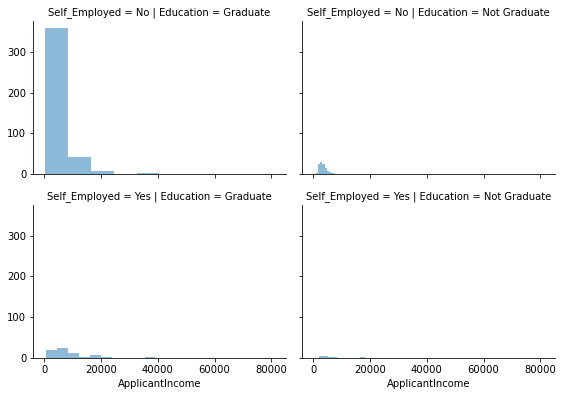

In [252]:
g=sns.FacetGrid(train, row='Self_Employed', col='Education', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


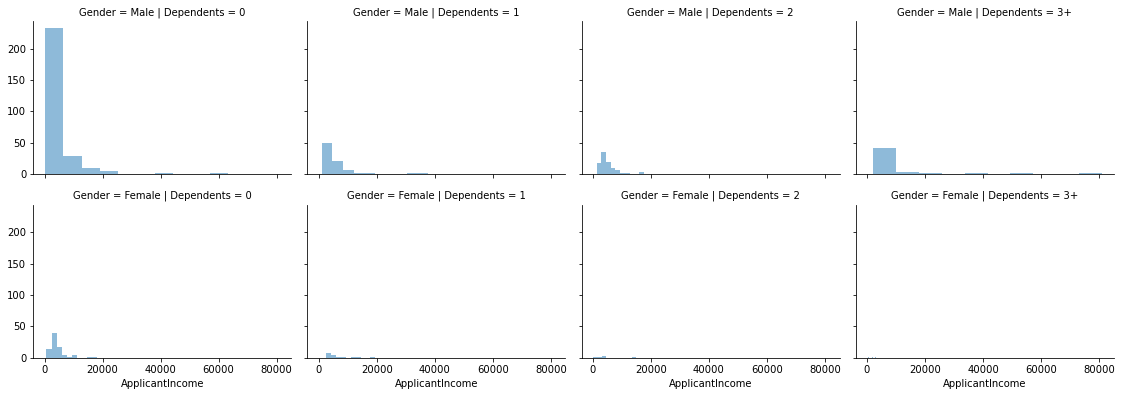

In [253]:
g=sns.FacetGrid(train, row='Gender', col='Dependents', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


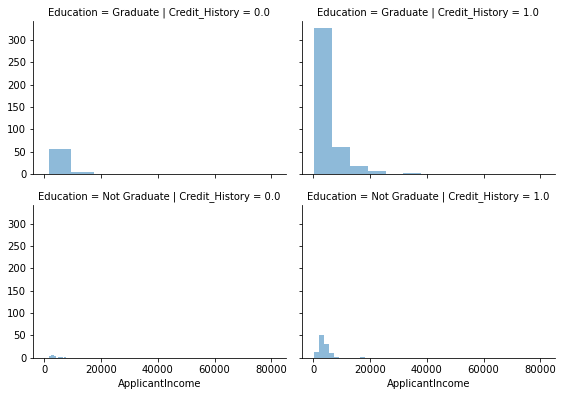

In [254]:
g=sns.FacetGrid(train, row='Education', col='Credit_History', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


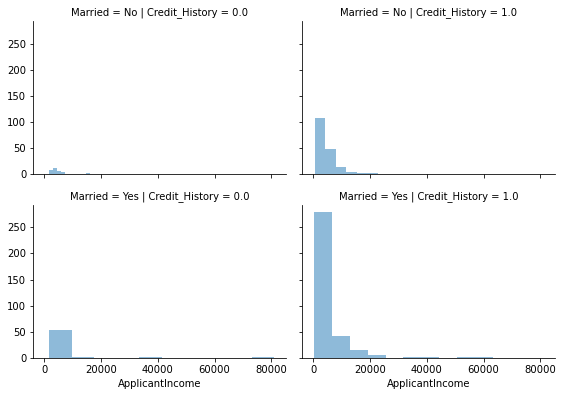

In [255]:
g=sns.FacetGrid(train, row='Married', col='Credit_History', size= 2.8, aspect=1.4)
g.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
g.add_legend()

In [256]:
X = train.iloc[:, 1: 12].values
y = train.iloc[:, 12].values

In [171]:
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [172]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 200)

In [174]:
X_train

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Rural'],
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [175]:
labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

In [176]:
X_train

array([[1, 0, 0, ..., 360.0, 1.0, 0],
       [1, 1, 2, ..., 360.0, 1.0, 0],
       [0, 0, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 1],
       [1, 1, 3, ..., 360.0, 1.0, 1]], dtype=object)

In [177]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [178]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [179]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [180]:
X_train.shape

(429, 11)

In [181]:
X_test.shape

(185, 11)

## Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [183]:
test_pred = classifier.predict(X_test)

In [184]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(test_pred, y_test))
print(classification_report(test_pred,y_test))

The accuracy of Naive Bayes is:  0.7783783783783784
              precision    recall  f1-score   support

           0       0.40      0.83      0.54        29
           1       0.96      0.77      0.85       156

    accuracy                           0.78       185
   macro avg       0.68      0.80      0.70       185
weighted avg       0.87      0.78      0.80       185



In [185]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=20, random_state=200)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [186]:
print('The accuracy of Gradient Boosting is: ', metrics.accuracy_score(gb_pred, y_test))
print(classification_report(test_pred,y_test))

The accuracy of Gradient Boosting is:  0.772972972972973
              precision    recall  f1-score   support

           0       0.40      0.83      0.54        29
           1       0.96      0.77      0.85       156

    accuracy                           0.78       185
   macro avg       0.68      0.80      0.70       185
weighted avg       0.87      0.78      0.80       185



In [187]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=2, min_samples_leaf=50)
DTC.fit(X_train, y_train)
dt_pred = DTC.predict(X_test)

In [188]:
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(dt_pred, y_test))
print(classification_report(test_pred,y_test))


The accuracy of Decision Tree Classifier is:  0.7891891891891892
              precision    recall  f1-score   support

           0       0.40      0.83      0.54        29
           1       0.96      0.77      0.85       156

    accuracy                           0.78       185
   macro avg       0.68      0.80      0.70       185
weighted avg       0.87      0.78      0.80       185



In [189]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=150, random_state=50)
randf.fit(X_train, y_train) 
r_pred = randf.predict(X_test)

In [190]:
print('The accuracy of Random Forest Classifier is: ', metrics.accuracy_score(r_pred, y_test))
print(classification_report(test_pred,y_test))

The accuracy of Random Forest Classifier is:  0.7567567567567568
              precision    recall  f1-score   support

           0       0.40      0.83      0.54        29
           1       0.96      0.77      0.85       156

    accuracy                           0.78       185
   macro avg       0.68      0.80      0.70       185
weighted avg       0.87      0.78      0.80       185



In [203]:
from sklearn.linear_model import LogisticRegression   

logReg = LogisticRegression(random_state = 0,max_iter = 500) 
logReg.fit(X_train, y_train)
l_pred = logReg.predict(X_test)

In [204]:
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(l_pred, y_test))
print(classification_report(test_pred,y_test))

The accuracy of Logistic Regression is:  0.7891891891891892
              precision    recall  f1-score   support

           0       0.40      0.83      0.54        29
           1       0.96      0.77      0.85       156

    accuracy                           0.78       185
   macro avg       0.68      0.80      0.70       185
weighted avg       0.87      0.78      0.80       185

